# Data preprocessing stage 3
- the spectrum data needs to be normalized as well as the conditional vector

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_stg3 = pd.read_csv('data/constant_stepper_stg3.csv')

In [3]:
data_stg3.head()

,Time,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,Intensities,Wavelengths,idx
0,2024-06-17 10:08:10.347822666,2.082440,0.0,-338208.0,"[1.416987, -1.878997, -7.094142, 5.856287, -4....","[634.835144, 635.296997, 635.758911, 636.22082...",0
1,2024-06-17 10:08:10.431182861,2.146321,0.0,-338208.0,"[1.416987, -1.878997, -7.094142, 5.856287, -4....","[634.835144, 635.296997, 635.758911, 636.22082...",0
2,2024-06-17 10:08:10.852890968,2.146321,0.0,-337925.0,"[1.416987, -1.878997, -7.094142, 5.856287, -4....","[634.835144, 635.296997, 635.758911, 636.22082...",1
3,2024-06-17 10:08:10.929437160,2.215926,0.0,-337925.0,"[-2.583013, -5.878997, -7.094142, 9.856287, -0...","[634.835144, 635.296997, 635.758911, 636.22082...",1
4,2024-06-17 10:08:10.933794975,2.215926,0.0,-337925.0,"[-2.583013, -5.878997, -7.094142, 9.856287, -0...","[634.835144, 635.296997, 635.758911, 636.22082...",1


## Conditional vector

In [4]:
def print_feature_statistics(data):
    # List of columns to analyze
    features = [
        "Stage3_OutputPower",
        "Stage3_Piezo",
        "Stage3_Stepper"
    ]
    
    for feature in features:
        if feature in data.columns:
            # Calculate statistics
            min_val = np.min(data[feature])
            max_val = np.max(data[feature])
            mean_val = np.mean(data[feature])
            median_val = np.median(data[feature])
            variance_val = np.var(data[feature])

            # Print statistics
            print(f"\nStatistics for {feature}:")
            print(f"  Minimum: {min_val}")
            print(f"  Maximum: {max_val}")
            print(f"  Mean: {mean_val}")
            print(f"  Median: {median_val}")
            print(f"  Variance: {variance_val}")
        else:
            print(f"\nFeature {feature} not found in the DataFrame")



In [5]:
print_feature_statistics(data_stg3)


Statistics for Stage3_OutputPower:
  Minimum: 1.68496
  Maximum: 2.26343
  Mean: 1.9270967319377075
  Median: 1.914118
  Variance: 0.007509378580093354

Statistics for Stage3_Piezo:
  Minimum: -1.614288
  Maximum: 1.054535
  Mean: -0.39387849897881033
  Median: -0.351685
  Variance: 0.30736530398120127

Statistics for Stage3_Stepper:
  Minimum: -338208.0
  Maximum: -302907.0
  Mean: -319752.763466939
  Median: -318127.0
  Variance: 106870061.41240302


## Intensities

### Statistical information about data

In [6]:
# Flatten the intensities into a single list
all_intensities_stg3 = np.concatenate(data_stg3['Intensities'].apply(eval).values)

# Calculate statistics
min_val = np.min(all_intensities_stg3)
max_val = np.max(all_intensities_stg3)
mean_val = np.mean(all_intensities_stg3)
median_val = np.median(all_intensities_stg3)
variance_val = np.var(all_intensities_stg3)

# Print statistics
print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: -26.207995
Maximum Intensity: 4192.00796
Mean Intensity: 353.5788310743647
Median Intensity: 6.333447
Variance of Intensities: 399012.83902535564


In [7]:
data_stg3.describe()

,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,idx
count,7834.000000,7834.000000,7834.000000,7834.000000
mean,1.927097,-0.393878,-319752.763467,72.587695
std,0.086662,0.554441,10338.457573,42.400572
min,1.684960,-1.614288,-338208.000000,0.000000
25%,1.863999,-0.815552,-327457.000000,40.000000
50%,1.914118,-0.351685,-318127.000000,80.000000
75%,1.975079,0.020722,-309020.000000,116.000000
max,2.263430,1.054535,-302907.000000,142.000000


### Distribution of wavelength intesities

In [8]:
def custom_bin_histogram(data_array, label, bins=None):
    
    if bins is None:
        bins = [-np.inf] + list(np.arange(-20, 4000, 50)) + [np.inf]

    # Generate labels for bins
    bin_labels = [f"<{bins[i]},{bins[i+1]})" for i in range(len(bins)-1)]

    # Bin the data
    binned_counts, _ = np.histogram(data_array, bins=bins)

    print("Bin counts:")
    for i, count in enumerate(binned_counts):
        print(f"  {bin_labels[i]}: {count} values", end=", ")

    plt.figure(figsize=(12, 6))
    plt.bar(bin_labels, 
            binned_counts, 
            color='blue', 
            alpha=0.7, 
            edgecolor='black')
    
    plt.title(label)
    plt.xlabel("Value Range")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()


Bin counts:
  <-inf,-20): 3158 values,   <-20,30): 5292695 values,   <30,80): 105801 values,   <80,130): 60370 values,   <130,180): 46796 values,   <180,230): 39381 values,   <230,280): 35297 values,   <280,330): 32391 values,   <330,380): 30470 values,   <380,430): 28992 values,   <430,480): 35963 values,   <480,530): 60299 values,   <530,580): 90884 values,   <580,630): 64204 values,   <630,680): 58728 values,   <680,730): 66236 values,   <730,780): 95906 values,   <780,830): 129200 values,   <830,880): 145973 values,   <880,930): 216986 values,   <930,980): 226795 values,   <980,1030): 203649 values,   <1030,1080): 125762 values,   <1080,1130): 83510 values,   <1130,1180): 57877 values,   <1180,1230): 48084 values,   <1230,1280): 45354 values,   <1280,1330): 42246 values,   <1330,1380): 39173 values,   <1380,1430): 34273 values,   <1430,1480): 27744 values,   <1480,1530): 21950 values,   <1530,1580): 18937 values,   <1580,1630): 20127 values,   <1630,1680): 21821 values,   <1680,173

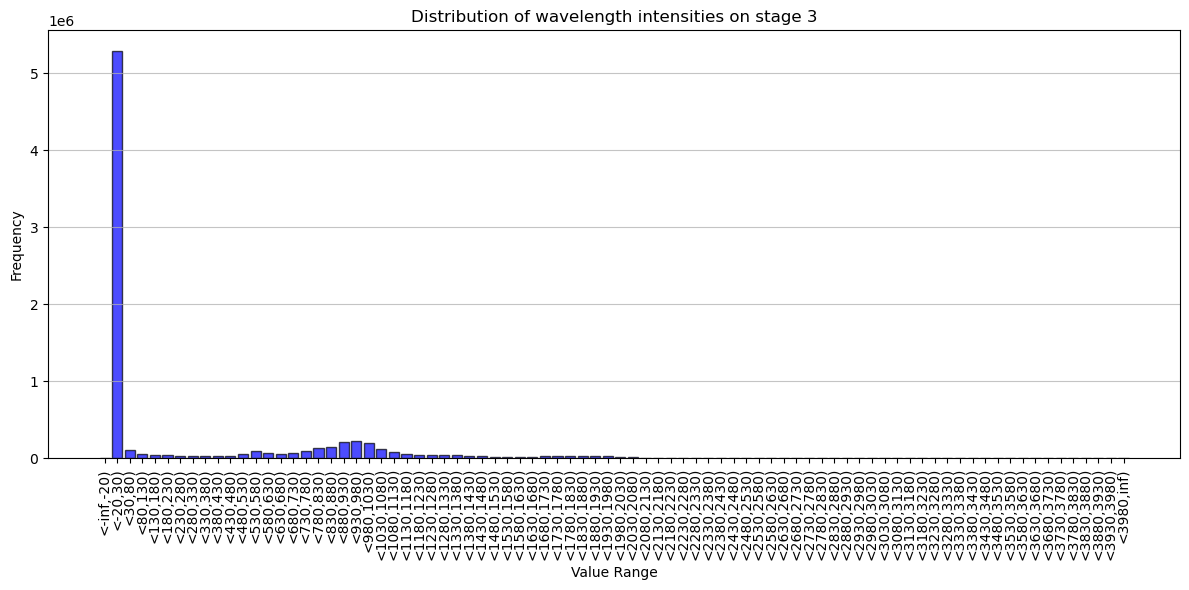

In [9]:
custom_bin_histogram(all_intensities_stg3, "Distribution of wavelength intensities on stage 3")

In [10]:
from matplotlib.colors import LogNorm

def create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength"):
    """
    Create and display a spectrogram-like plot.

    Parameters:
        wavelengths (numpy.ndarray): 1D array of wavelength values.
        intensities (numpy.ndarray): 2D array where each row corresponds to intensities for a wavelength.

    Returns:
        None: Displays the spectrogram.
    """
    # Flatten the wavelengths and intensities into paired values
    all_wavelengths = np.tile(wavelengths, len(intensities))
    all_intensities = np.concatenate(intensities)

    # Define bins for the 2D histogram
    wavelength_bins = np.linspace(min(wavelengths), max(wavelengths), len(wavelengths) + 1)
    intensity_bins = np.linspace(min(all_intensities), max(all_intensities), 100)

    # Create 2D histogram
    histogram, x_edges, y_edges = np.histogram2d(all_wavelengths, all_intensities, bins=[wavelength_bins, intensity_bins])

    # Plot the spectrogram with a logarithmic color scale
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(x_edges, 
                   y_edges, 
                   histogram.T, 
                   shading='auto', 
                   cmap='viridis', 
                   norm=LogNorm(vmin=1, vmax=histogram.max()))
    plt.colorbar(label='Number of Occurrences (Log Scale)')
    plt.xlabel('Wavelengths')
    plt.ylabel('Intensities')
    plt.title(label)
    plt.tight_layout()
    plt.show()


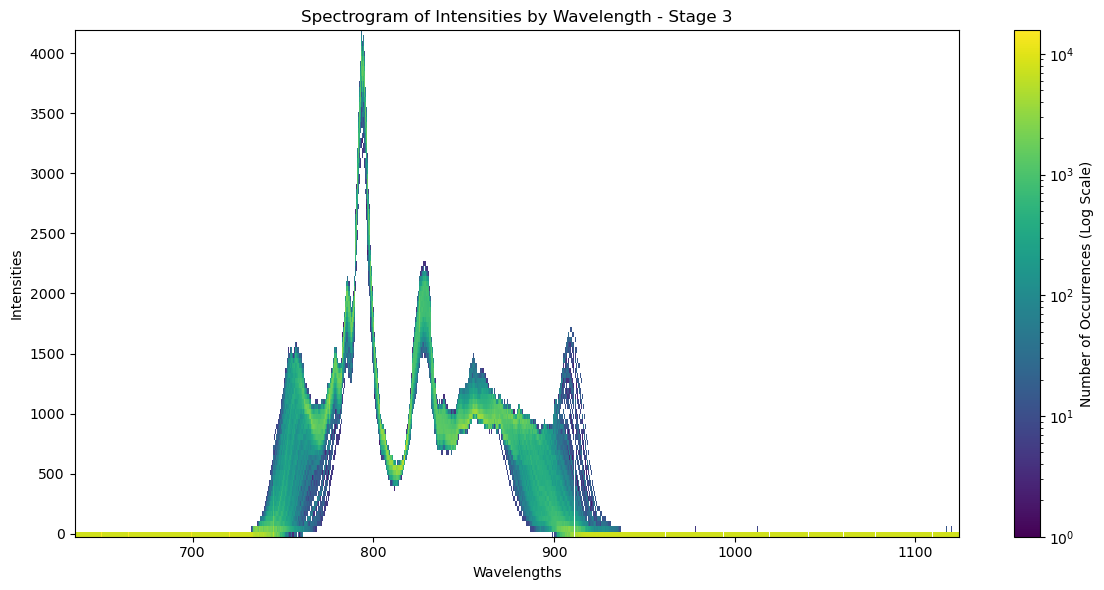

In [11]:
wavelengths = np.array(eval(data_stg3['Wavelengths'].iloc[0]))
intensities = data_stg3['Intensities'].apply(eval).values

create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength - Stage 3")

## Identify outliers

In [12]:
def analyze_outliers(data, lower_percentile, upper_percentile):
    """
    Analyzes data for outliers based on specified percentile bounds and generates a histogram.
    
    Parameters:
        data (array-like): The data to analyze.
        lower_percentile (float): The lower percentile for calculating bounds (e.g., 0.1).
        upper_percentile (float): The upper percentile for calculating bounds (e.g., 99.9).
    
    Returns:
        tuple: A tuple containing the lower bound and upper bound.
    """
    # Calculate lower and upper bounds
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)

    print(f"Typical range: {lower_bound} to {upper_bound}")

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"Outliers: {outliers}")

    # Plot histogram with bounds
    plt.hist(data, bins=50, alpha=0.7, label="Original Data")
    plt.axvline(lower_bound, color='r', linestyle='--', label=f"{lower_percentile}th Percentile")
    plt.axvline(upper_bound, color='g', linestyle='--', label=f"{upper_percentile}th Percentile")
    plt.legend()
    plt.title("Data Distribution with Outlier Bounds")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

    return lower_bound, upper_bound


Typical range: -12.995248 to 3925.00796
Outliers: [-17.207995 -17.207995 -17.207995 ... -21.207995 -21.207995 -21.207995]


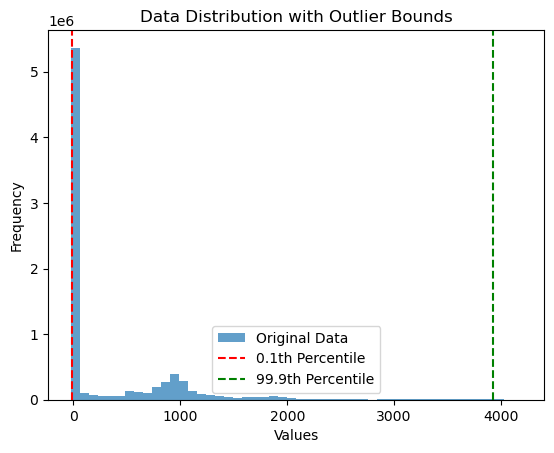

In [13]:
lower_bound_int, upper_bound_int = analyze_outliers(all_intensities_stg3, 
                                            0.1, 
                                            99.9)


In [14]:
lower_bound_stg3 = np.percentile(all_intensities_stg3, 0.1)
upper_bound_stg3 = np.percentile(all_intensities_stg3, 99.9)

print(f"Typical range of stage 3: {lower_bound_stg3} to {upper_bound_stg3}")

# Identify outliers
outliers_stg3 = all_intensities_stg3[(all_intensities_stg3 < lower_bound_stg3) | (all_intensities_stg3 > upper_bound_stg3)]

print(f"Outliers: {outliers_stg3}")

Typical range of stage 3: -12.995248 to 3925.00796
Outliers: [-17.207995 -17.207995 -17.207995 ... -21.207995 -21.207995 -21.207995]


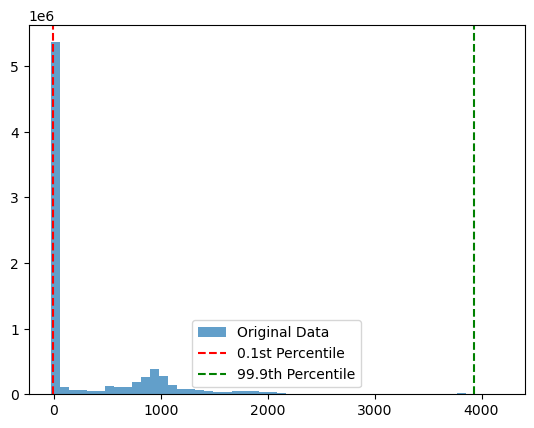

In [15]:
plt.hist(all_intensities_stg3, bins=50, alpha=0.7, label="Original Data")
plt.axvline(lower_bound_stg3, color='r', linestyle='--', label="0.1st Percentile")
plt.axvline(upper_bound_stg3, color='g', linestyle='--', label="99.9th Percentile")
plt.legend()
plt.show()

## Normalization

### Intensities

In [16]:
def clip_and_normalize(data, lower_bound, upper_bound):
    # Clip the data
    clipped_data = np.clip(data, lower_bound, upper_bound)
    
    # Normalize the clipped data between 0 and 1
    min_val = lower_bound
    max_val = upper_bound
    
    normalized_data = (clipped_data - min_val) / (max_val - min_val)
    
    return normalized_data

In [17]:
data_stg3['Intensities'] = data_stg3['Intensities'].apply(lambda x: clip_and_normalize(eval(x), 
                                                    lower_bound_int, 
                                                    upper_bound_int))
data_stg3.head()

,Time,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,Intensities,Wavelengths,idx
0,2024-06-17 10:08:10.347822666,2.082440,0.0,-338208.0,"[0.003659782442716588, 0.0028228141047263464, ...","[634.835144, 635.296997, 635.758911, 636.22082...",0
1,2024-06-17 10:08:10.431182861,2.146321,0.0,-338208.0,"[0.003659782442716588, 0.0028228141047263464, ...","[634.835144, 635.296997, 635.758911, 636.22082...",0
2,2024-06-17 10:08:10.852890968,2.146321,0.0,-337925.0,"[0.003659782442716588, 0.0028228141047263464, ...","[634.835144, 635.296997, 635.758911, 636.22082...",1
3,2024-06-17 10:08:10.929437160,2.215926,0.0,-337925.0,"[0.0026440392376643287, 0.0018070708996740868,...","[634.835144, 635.296997, 635.758911, 636.22082...",1
4,2024-06-17 10:08:10.933794975,2.215926,0.0,-337925.0,"[0.0026440392376643287, 0.0018070708996740868,...","[634.835144, 635.296997, 635.758911, 636.22082...",1


In [18]:
# Flatten the intensities into a single list
all_intensities_stg3 = np.concatenate(data_stg3['Intensities'].values)

# Calculate statistics
min_val = np.min(all_intensities_stg3)
max_val = np.max(all_intensities_stg3)
mean_val = np.mean(all_intensities_stg3)
median_val = np.median(all_intensities_stg3)
variance_val = np.var(all_intensities_stg3)

# Print statistics
print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: 0.0
Maximum Intensity: 1.0
Mean Intensity: 0.09307341309307185
Median Intensity: 0.004908247652194396
Variance of Intensities: 0.02570296261326347


### Conditional vector

In [19]:
data_stg3.head()

,Time,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,Intensities,Wavelengths,idx
0,2024-06-17 10:08:10.347822666,2.082440,0.0,-338208.0,"[0.003659782442716588, 0.0028228141047263464, ...","[634.835144, 635.296997, 635.758911, 636.22082...",0
1,2024-06-17 10:08:10.431182861,2.146321,0.0,-338208.0,"[0.003659782442716588, 0.0028228141047263464, ...","[634.835144, 635.296997, 635.758911, 636.22082...",0
2,2024-06-17 10:08:10.852890968,2.146321,0.0,-337925.0,"[0.003659782442716588, 0.0028228141047263464, ...","[634.835144, 635.296997, 635.758911, 636.22082...",1
3,2024-06-17 10:08:10.929437160,2.215926,0.0,-337925.0,"[0.0026440392376643287, 0.0018070708996740868,...","[634.835144, 635.296997, 635.758911, 636.22082...",1
4,2024-06-17 10:08:10.933794975,2.215926,0.0,-337925.0,"[0.0026440392376643287, 0.0018070708996740868,...","[634.835144, 635.296997, 635.758911, 636.22082...",1


Typical range: 1.698786 to 2.215926
Outliers: [2.223322 2.248488 2.26343  2.243279 2.243279 2.220513 2.220513 1.68496
 1.68496  1.68496  1.68496  1.695206 1.695206]


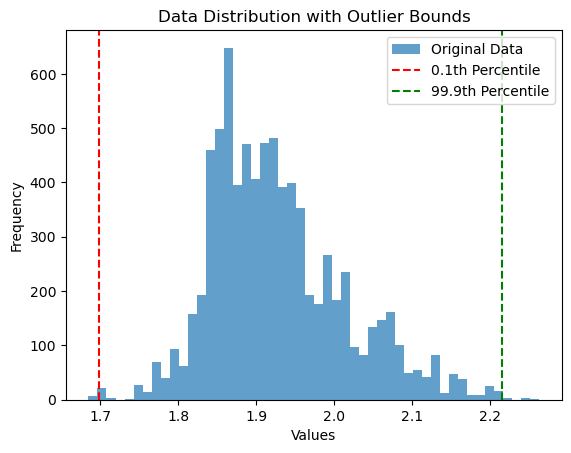

In [20]:
lower_bound_int, upper_bound_int = analyze_outliers(data_stg3.Stage3_OutputPower.values, 
                                            0.1, 
                                            99.9)

Typical range: -1.589966 to 1.038879
Outliers: [-1.598083 -1.598083 -1.598083  1.054535  1.054535  1.054535  1.054535
  1.040131  1.040131 -1.614288 -1.614288 -1.614288 -1.614288]


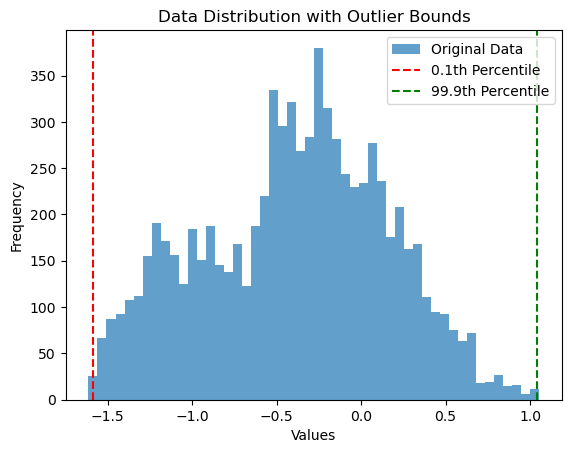

In [21]:
lower_bound_int, upper_bound_int = analyze_outliers(data_stg3.Stage3_Piezo.values, 
                                            0.1, 
                                            99.9)

Typical range: -337287.0 to -302907.0
Outliers: [-338208. -338208. -337925. -337925. -337925.]


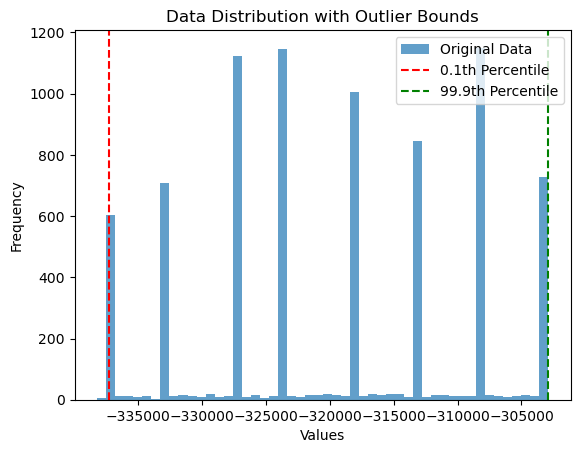

In [22]:
lower_bound_int, upper_bound_int = analyze_outliers(data_stg3.Stage3_Stepper.values, 
                                            0.1, 
                                            99.9)

## Create dataset

In [23]:
# Create 'cond_vector' as a numpy array
columns_for_cond_vector = [
    'Stage3_OutputPower',
    'Stage3_Piezo',
    'Stage3_Stepper',
]
data_stg3['cond_vector'] = data_stg3[columns_for_cond_vector].apply(lambda row: np.array(row.values), axis=1)

# Keep only the required columns
processed_data_stg3 = data_stg3[['Time', 'idx', 'Intensities', 'cond_vector']]

# Rename columns
processed_data_stg3.rename(columns={
    'Intensities': 'intensities',
    'Time_spectrum': 'time_spectrum',
    'Time_parameters': 'time_parameters'
}, inplace=True)

processed_data_stg3.head()

/tmp/ipykernel_155021/3244189765.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data_stg3.rename(columns={


,Time,idx,intensities,cond_vector
0,2024-06-17 10:08:10.347822666,0,"[0.003659782442716588, 0.0028228141047263464, ...","[2.08244, 0.0, -338208.0]"
1,2024-06-17 10:08:10.431182861,0,"[0.003659782442716588, 0.0028228141047263464, ...","[2.146321, 0.0, -338208.0]"
2,2024-06-17 10:08:10.852890968,1,"[0.003659782442716588, 0.0028228141047263464, ...","[2.146321, 0.0, -337925.0]"
3,2024-06-17 10:08:10.929437160,1,"[0.0026440392376643287, 0.0018070708996740868,...","[2.215926, 0.0, -337925.0]"
4,2024-06-17 10:08:10.933794975,1,"[0.0026440392376643287, 0.0018070708996740868,...","[2.215926, 0.0, -337925.0]"
